https://www.kaggle.com/mansoordaku/ckdisease/downloads/ckdisease.zip/1
    
## 本次目標：以多項數據，預測該病患具有慢性腎病

## 我們使用以下表示來收集數據集


## 目標欄位：

### 目標是'分類'，它是'ckd'或'notckd' -  ckd =慢性腎病

* classfication	-	class種類



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("kidney_disease.csv") #讀取CSV檔
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

## 查看目標 : << classification >> 佔資料的比例有多少
## 以圖表呈現

classification欄位的資料型態為<class 'str'>


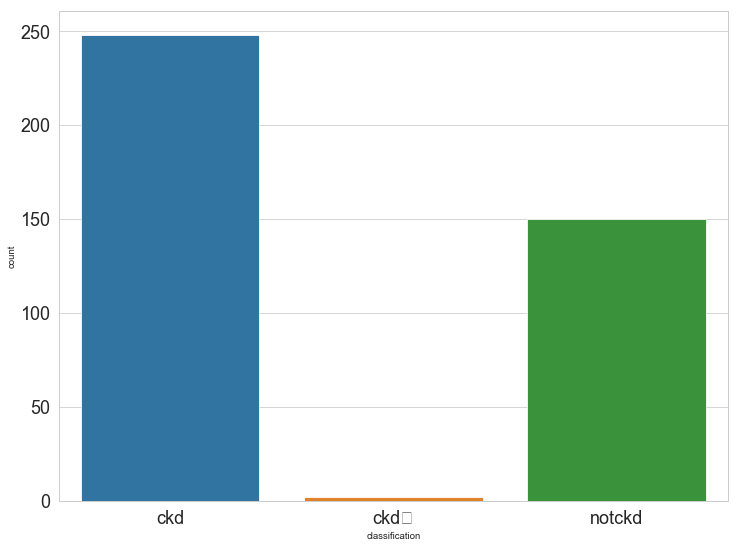

In [2]:
df['classification'].value_counts

name = 'classification'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

In [3]:
condition = df['classification']!='ckd'
df['classification'] = np.where(condition,1,0)

classification欄位的資料型態為<class 'numpy.int32'>


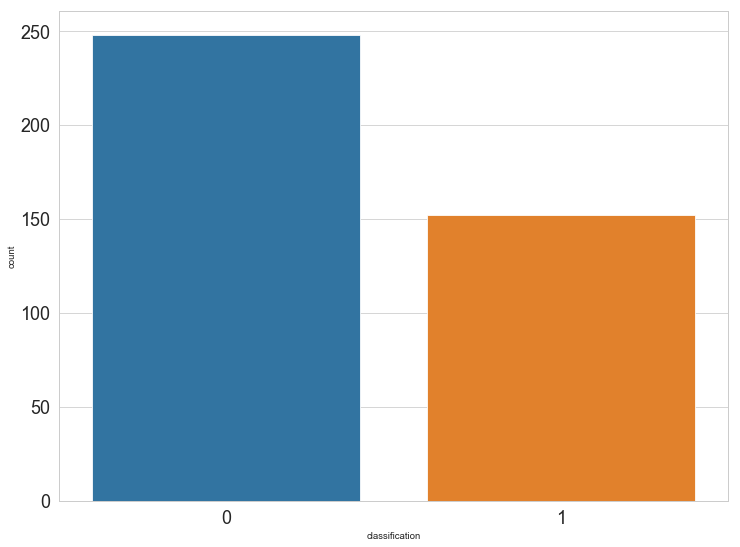

In [4]:
df['classification'].value_counts

name = 'classification'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

In [5]:
## dropna可去掉包含nan的行或列
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
df = df.reset_index(drop=True)

## 檢查是否還有缺失值
df.isnull().sum(axis=0)


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
id                158 non-null int64
age               158 non-null float64
bp                158 non-null float64
sg                158 non-null float64
al                158 non-null float64
su                158 non-null float64
rbc               158 non-null object
pc                158 non-null object
pcc               158 non-null object
ba                158 non-null object
bgr               158 non-null float64
bu                158 non-null float64
sc                158 non-null float64
sod               158 non-null float64
pot               158 non-null float64
hemo              158 non-null float64
pcv               158 non-null object
wc                158 non-null object
rc                158 non-null object
htn               158 non-null object
dm                158 non-null object
cad               158 non-null object
appet             158 non-null object
pe         

## one hot encoding

In [7]:
df2 = pd.get_dummies(df)

In [8]:
# df2.to_csv("resize_data.csv")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## 標準化

In [10]:
y = df2['classification']
df2 = df2.drop('classification',axis=1)
X = preprocessing.scale(df2)


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


## 切分資料

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.5,
                                                 random_state=2)
X_train.shape,X_test.shape

((79, 178), (79, 178))

## 使用決策樹預測


![title](1.png)

[參考資料](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image  

In [13]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

### criterion使用的entropy, 也可以使用gini impurity

### max_depth在實務上很常用到，主要是可以防止樹長得過高造成overfit
clf = model.fit(X_train, y_train)

In [14]:

y_pred = model.predict(X_test)

print("決策樹預測率:"+str(model.score(X_test,y_test)))

決策樹預測率:0.9873417721518988


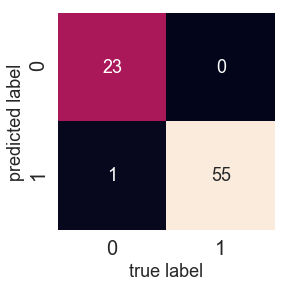

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 使用Voting：
[參考資料](https://blog.csdn.net/yanyanyufei96/article/details/71195063)

### 將多種模型的結果通過投票的方式進行聚合。選擇的模型的結果要有好有壞，這樣聚合的結果最佳。


![title](2.png)

### 將多個模型的結果組合在一起，透過投票的方式得到最終結果

![title](3.png)




## 使用多棵決策樹 再加以投票預測

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn import metrics

DTree = DecisionTreeClassifier()

model  = VotingClassifier(estimators=[('DTree1', DTree), ('DTree2', DTree), ('DTree3', DTree)], voting='hard')

### hard vote 的原理，在這種少數服從多數的硬投票中，投出的結果，表明大多數模型認同的結果。

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.92      0.96        60

   micro avg       0.94      0.94      0.94        79
   macro avg       0.90      0.96      0.92        79
weighted avg       0.95      0.94      0.94        79



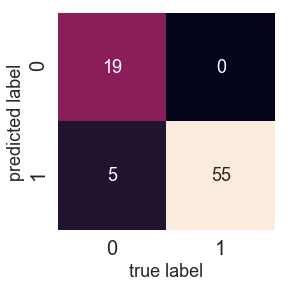

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [19]:
acc = accuracy_score(y_test, y_pred)
print("3顆決策樹Voting預測率: ", acc)

3顆決策樹Voting預測率:  0.9367088607594937


## 使用不同演算法(SVM,KNN,DTree) 再加以投票預測

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

DTree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
KNN = KNeighborsClassifier(n_neighbors=3)
SVM = SVC(gamma='auto')

model  = VotingClassifier(estimators=[('DTree1', DTree), ('DTree2', KNN), ('DTree3', SVM)], voting='hard')

### hard vote 的原理，在這種少數服從多數的硬投票中，投出的結果，表明大多數模型認同的結果。

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.95      0.97        58

   micro avg       0.96      0.96      0.96        79
   macro avg       0.94      0.97      0.95        79
weighted avg       0.97      0.96      0.96        79



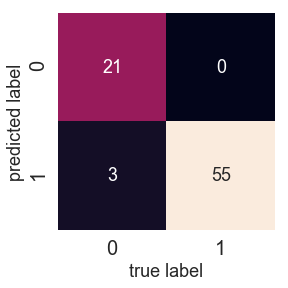

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
acc = accuracy_score(y_test, y_pred)
print("不同演算法Voting預測率: ", acc)

不同演算法Voting預測率:  0.9620253164556962


## 得到：
* 決策樹預測率:0.9367088607594937

* 3顆決策樹Voting預測率:  0.9873417721518988
    
* 不同演算法Voting預測率:  0.9240506329113924

